In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# For LSTM and RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam

/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.20) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input layer
    Dense(1)                                           # Output layer
])

/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


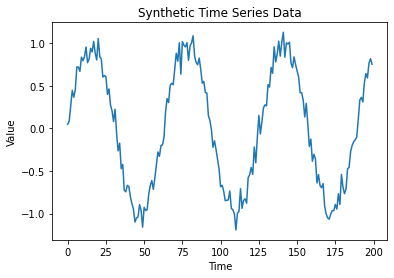

In [3]:
# Create a sine wave with noise
np.random.seed(42)
time = np.arange(0, 200)
data = np.sin(0.1 * time) + np.random.normal(scale=0.1, size=len(time))

plt.plot(time, data)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [4]:
def create_features(series, window=10):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_features(data, window=window_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [5]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))

Random Forest RMSE: 0.12367922990988224


In [6]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))

XGBoost RMSE: 0.1386381887720576


In [7]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, verbose=0)

lstm_preds = lstm_model.predict(X_test_lstm)
print("LSTM RMSE:", np.sqrt(mean_squared_error(y_test, lstm_preds)))

/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step
LSTM RMSE: 0.11243364297942707


In [8]:
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
rnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
rnn_model.fit(X_train_lstm, y_train, epochs=10, verbose=0)

rnn_preds = rnn_model.predict(X_test_lstm)
print("RNN RMSE:", np.sqrt(mean_squared_error(y_test, rnn_preds)))

/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
RNN RMSE: 0.1146794377109604


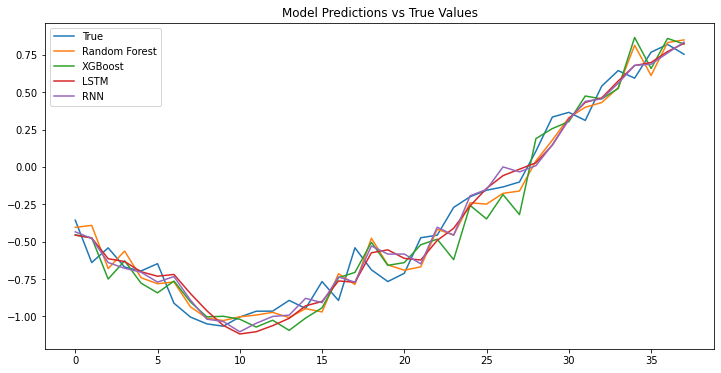

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(rf_preds, label='Random Forest')
plt.plot(xgb_preds, label='XGBoost')
plt.plot(lstm_preds, label='LSTM')
plt.plot(rnn_preds, label='RNN')
plt.legend()
plt.title("Model Predictions vs True Values")
plt.show()